<a href="https://colab.research.google.com/github/aishwaryaprabhat/Deep-Learning-with-TF-2.0/blob/main/Linear_Regression_on_Moore's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the data

In [1]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-03-24 02:14:01--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-03-24 02:14:01 (47.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [2]:
!ls

moore.csv  sample_data


In [3]:
!mv moore.csv sample_data/

In [4]:
!ls sample_data

anscombe.json		      mnist_test.csv	     README.md
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  moore.csv


## Preprocessing and EDA

In [5]:
import pandas as pd 

df = pd.read_csv('sample_data/moore.csv', header=None)
df.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [11]:
X = df.values[:,0].reshape(-1,1) #this is just to follow TF convention of having an NxD array, in this case our D=1
Y = df.values[:,1]

In [12]:
print(X.shape)
print(Y.shape)

(162, 1)
(162,)


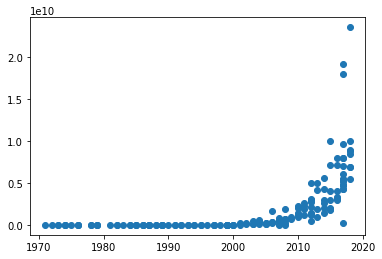

In [13]:
from matplotlib import pyplot as plt

plt.scatter(X,Y)

### Data Preprocessing (Transformations)

In [14]:
import numpy as np

Y = np.log(Y)

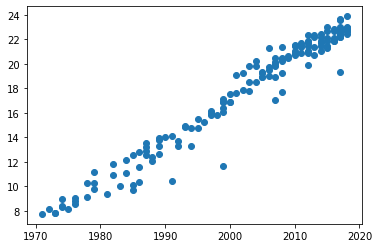

In [15]:
plt.scatter(X,Y)

In [16]:
X = X-np.mean(X) #just to center it around 0

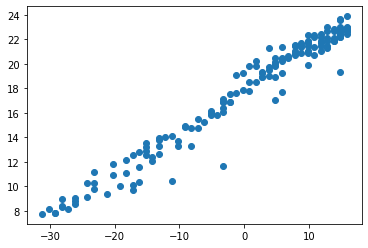

In [17]:
plt.scatter(X,Y)

## Architecting and Compiling the Model

In [30]:
import tensorflow as tf

model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Input(shape=(1,)),
     tf.keras.layers.Dense(1)
    ]
)


model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Fit model on data

In [28]:
trained_model = model.fit(X, Y, epochs=200)

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 0.9694
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 0.9219
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8804
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8742
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8750
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8872
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8757
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8923
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8757
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8754
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8730
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8712
Epoch 13/200
6/6 [==============================] - 0s 2ms/st

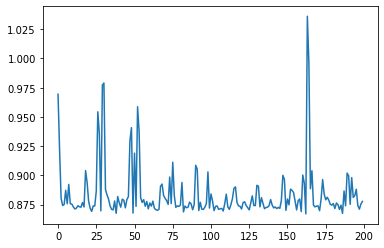

In [29]:
plt.plot(trained_model.history["loss"], label="loss")

### Using a learning rate scheduler

In [32]:
def schedule(epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
trained_model = model.fit(X,Y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 313.2477
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 289.1539
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 252.5850
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 205.3998
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 166.1409
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 116.7236
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 94.0267
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 63.9028
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 55.5584
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 36.0696
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 34.0677
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 25.5729
Epoch 13/200
6/6 [=========================

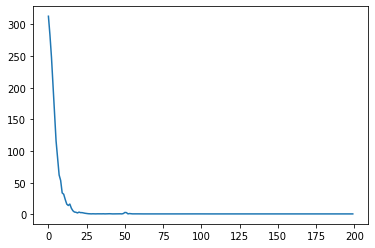

In [33]:
plt.plot(trained_model.history["loss"], label="loss")

## Making predictions

In [35]:
p = model.predict(X)

In [37]:
p.flatten()

array([ 7.286454,  7.622859,  7.959263,  7.959263,  8.295668,  8.295668,
        8.295668,  8.632072,  8.968477,  8.968477,  8.968477,  9.641287,
        9.641287,  9.977692,  9.977692,  9.977692, 10.6505  , 10.986905,
       10.986905, 11.32331 , 11.659714, 11.659714, 11.996119, 11.996119,
       11.996119, 12.332523, 12.332523, 12.332523, 12.668928, 12.668928,
       12.668928, 12.668928, 13.005333, 13.005333, 13.341738, 13.341738,
       13.341738, 13.341738, 13.678143, 14.014547, 14.014547, 14.350952,
       14.350952, 14.687356, 14.687356, 15.023761, 15.023761, 15.360166,
       16.705784, 15.360166, 15.69657 , 16.032974, 16.032974, 16.032974,
       16.369379, 16.705784, 16.705784, 17.042189, 17.042189, 16.705784,
       16.705784, 16.705784, 17.042189, 17.378593, 17.378593, 17.714998,
       18.387808, 18.387808, 18.724213, 19.060617, 18.724213, 19.060617,
       19.397022, 19.733425, 18.051403, 18.051403, 17.714998, 18.724213,
       18.724213, 19.060617, 19.397022, 18.051403, 

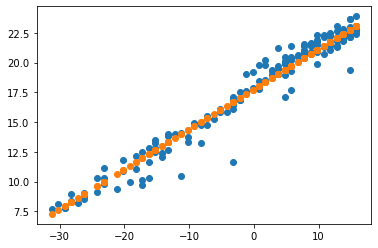

In [39]:
plt.scatter(X,Y)
plt.scatter(X,p)